In [3]:

# Importing relevant libraries

import numpy as np # numpy library for numerical operations
import pandas as pd # pandas library for data manipulation and analysis
import seaborn as sns # seaborn library for statistical data visualization
import matplotlib.pyplot as plt # matplotlib.pyplot library for plotting

from sklearn.model_selection import train_test_split # train_test_split for splitting data
from sklearn.preprocessing import StandardScaler # StandardScaler for feature scaling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # metrics for evaluating classification models

import torch # torch library for building neural networks
import torch.nn as nn # torch.nn for neural network modules
import torch.optim as optim # torch.optim for optimization algorithms
from torch.utils.data import TensorDataset, DataLoader # TensorDataset and DataLoader for creating data pipelines

## TASK-01_Classification

In [4]:
data = pd.read_csv('adult.csv') # Read the CSV file into a pandas DataFrame
df = data.copy() # Create a copy of the DataFrame

In [5]:
df.head() # first 5 rows of the DataFrame

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:

# Replacing '?' with numpy's NaN in the entire DataFrame
df.replace('?', np.nan, inplace=True)


In [7]:
print('Shape of the dataset:',df.shape) # shape of the DataFrame (number of rows and columns)
print('\nColumns in the dataset:',df.columns)
print('\nData types:',df.dtypes)
print('\nMissing values in the dataset:',df.isna().sum())
print('\nDuplicate rows in the dataset:',df.duplicated().sum())

Shape of the dataset: (32561, 15)

Columns in the dataset: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Data types: age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Missing values in the dataset: age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
ca

In [8]:

# Dropping duplicate rows
df.drop_duplicates(inplace=True)


In [9]:

# Filling the missing values by Mode imputation
mode_workclass = df['workclass'].mode()[0]
mode_occupation = df['occupation'].mode()[0]
mode_country = df['native.country'].mode()[0]

df['workclass'] = df['workclass'].fillna(mode_workclass)
df['occupation'] = df['occupation'].fillna(mode_occupation)
df['native.country'] = df['native.country'].fillna(mode_country)


In [10]:

# Verifying that there are no missing values anymore in the dataset
print(df.isna().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [11]:
print(df['income'].value_counts()) # Print the count of each unique value in the target 'income' column

income
<=50K    24698
>50K      7839
Name: count, dtype: int64


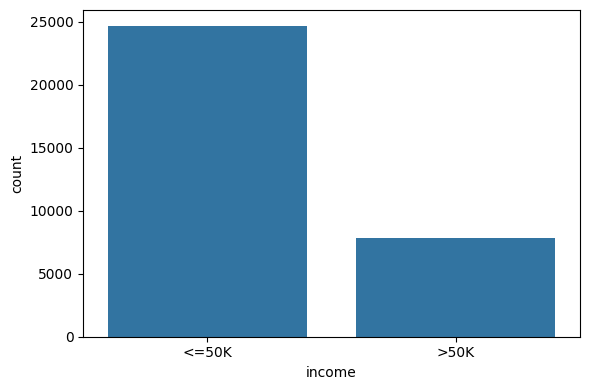

In [12]:
plt.figure(figsize=(6,4)) # a new figure for the plot with a specified size
sns.countplot(x='income', data=df) # a count plot of the target column
plt.tight_layout() # Adjusting plot to prevent labels overlapping
plt.show() # Display the plot

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist() # Get a list of names of numeric columns
categorical_cols = df.select_dtypes(include='object').columns.tolist() # Get a list of names of categorical columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [15]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # Perform one-hot encoding on categorical columns, dropping the first category
print(df_encoded.head())

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False               True   
1                False                   False               True   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  ...  native.country_Puerto-Rico  \
0                   False  ...                       False  

In [16]:
print(df_encoded.shape)

(32537, 98)


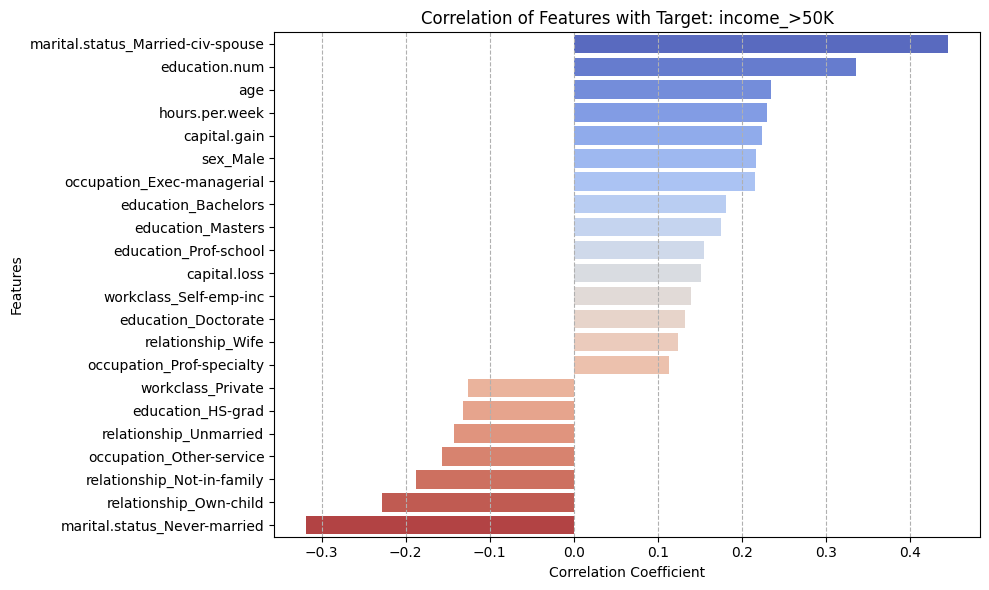

In [17]:
correlation_matrix = df_encoded.corr() # Calculate the correlation matrix for the encoded DataFrame

# Get the correlations of all features with the target income > 50K
income_correlation = correlation_matrix['income_>50K'].sort_values(ascending=False) # Get correlations of all features with the target, sorted in descending order

# Remove the correlation of 'Star type' with itself
income_correlation = income_correlation.drop('income_>50K') # Remove the self-correlation of 'income'

filtered_correlation = income_correlation[abs(income_correlation) >= 0.1]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_correlation.values, y=filtered_correlation.index, hue=filtered_correlation.index, palette='coolwarm', legend= False) # Create a bar plot of feature correlations with 'Star type'
plt.title('Correlation of Features with Target: income_>50K') # Set the title of the plot
plt.xlabel('Correlation Coefficient') # Set the label for the x-axis
plt.ylabel('Features') # Set the label for the y-axis
plt.grid(axis='x', linestyle='--') # Add a grid to the x-axis
plt.tight_layout()
plt.show()

In [18]:
X = df_encoded.drop(columns = ['income_>50K'],axis=1) # Create feature matrix X by dropping the target column
y = df_encoded['income_>50K'] # Create target vector y with the 'Star type' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # Split data into training and testing sets (75% train, 25% test), stratified by y

In [19]:
scaler = StandardScaler() # Initialize StandardScaler
X_train_scaled = scaler.fit_transform(X_train) # Fit scaler on training data and transform training data
X_test_scaled = scaler.transform(X_test) # Transform test data using the fitted scaler

In [20]:
XtrainTensor = torch.tensor(X_train_scaled, dtype=torch.float32) # Convert scaled training features to a PyTorch tensor
ytrainTensor = torch.tensor(y_train.values, dtype=torch.long) # Convert training labels to a PyTorch tensor
XtestTensor = torch.tensor(X_test_scaled, dtype=torch.float32) # Convert scaled test features to a PyTorch tensor
ytestTensor = torch.tensor(y_test.values, dtype=torch.long) # Convert test labels to a PyTorch tensor

In [21]:
print(XtrainTensor.shape) # Print the shape of the training features tensor
print(XtestTensor.shape) # Print the shape of the test features tensor

torch.Size([26029, 97])
torch.Size([6508, 97])


In [100]:
trainds = TensorDataset(XtrainTensor, ytrainTensor) # Create a TensorDataset from training features and labels
traindl = DataLoader(trainds, batch_size=32, shuffle=True) # Create a DataLoader for the training dataset with batching and shuffling

In [101]:
class incomeNN(nn.Module): # Define a neural network class inheriting from nn.Module
  def __init__(self, in_features): # Constructor for the class
    super().__init__() # Call the constructor of the parent class
    self.network = nn.Sequential( # Define the network as a sequence of layers
        nn.Linear(in_features, 48), # First linear layer
        nn.ReLU(), # ReLU activation function
        nn.Linear(48, 16), # Second linear layer
        nn.ReLU(),
        nn.Linear(16, 1)   # (output layer)
    )

  def forward(self, x): # Define the forward pass of the network
    return self.network(x) # Pass the input through the network


model = incomeNN(in_features=XtrainTensor.shape[1]) # Initialize the neural network model
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(2)) # Define the loss function (Binary Cross-Entropy Loss)
optimizer = optim.Adam(model.parameters(), lr = 0.005) # Define the optimizer (Adam) with a learning rate

In [102]:
best_loss = float('inf') # Initialize best_loss to infinity
best_model_state = None # Initialize best_model_state to None

for epoch in range(25): # Loop through epochs
    model.train() # Set the model to training mode
    total_loss = 0.0 # Initialize total loss for the epoch

    for xb, yb in traindl: # Iterate over batches in the training DataLoader
        optimizer.zero_grad() # Zero the gradients
        preds = model(xb) # Perform forward pass
        yb = yb.unsqueeze(1) # Reshape target to match output size
        loss = criterion(preds, yb.float()) # Calculate the loss, ensure yb is float
        loss.backward() # Perform backward pass (calculate gradients)
        optimizer.step() # Update the model parameters
        total_loss += loss.item() # Add the batch loss to the total loss

    avg_loss = total_loss / len(traindl) # Calculate the average loss for the epoch

    if avg_loss < best_loss: # Check if the current average loss is better than the best loss
        best_loss = avg_loss # Update the best loss
        best_model_state = model.state_dict() # Save the current model state

    if epoch % 5 == 0: # Print loss every 2 epochs
        print(f"Epoch {epoch:02d} | loss: {avg_loss:.4f}")

model.load_state_dict(best_model_state) # Load the best model state
print(f"\nBest model loaded with loss: {best_loss:.4f}") # Print the best loss

Epoch 00 | loss: 0.4962
Epoch 05 | loss: 0.4390
Epoch 10 | loss: 0.4201
Epoch 15 | loss: 0.4062
Epoch 20 | loss: 0.3951

Best model loaded with loss: 0.3836


In [103]:
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
  # 1. Get the raw logits
  y_logits = model(XtestTensor)

  # 2. Apply Sigmoid to get probabilities
  y_pred_proba = torch.sigmoid(y_logits).numpy() #

  # 3. Get the Predicted Class Labels (0 or 1)
  # y_pred_class is correctly calculated by thresholding the probability
  y_pred_class = (y_pred_proba >= 0.5).astype(int)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4940
           1       0.64      0.75      0.69      1568

    accuracy                           0.84      6508
   macro avg       0.78      0.81      0.79      6508
weighted avg       0.85      0.84      0.84      6508

Confusion Matrix:

[[4277  663]
 [ 385 1183]]


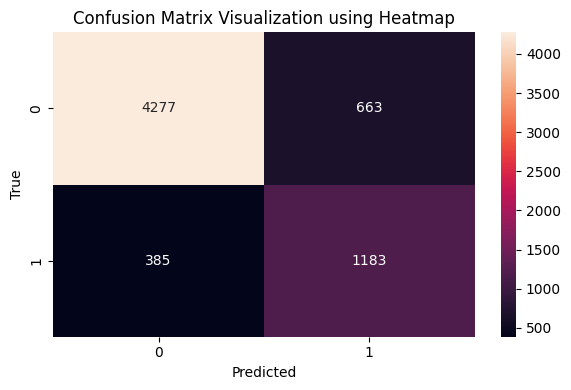

In [104]:
y_true = ytestTensor.squeeze().numpy() # Convert true labels tensor to a numpy array

print("Classification Report:")
print(classification_report(y_true, y_pred_class))

# Calculating Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class) # Calculate the confusion matrix
print("Confusion Matrix:\n")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d') # Create a heatmap visualization of the confusion matrix with annotations
plt.xlabel('Predicted') # Set the label for the x-axis
plt.ylabel('True') # Set the label for the y-axis
plt.title('Confusion Matrix Visualization using Heatmap') # Set the title of the plot
plt.tight_layout()
plt.show()

In [105]:

from sklearn.metrics import roc_curve, roc_auc_score

roc = roc_auc_score(y_true, y_pred_proba) # Calculate the ROC AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba) # Calculate the ROC curve
print("ROC AUC Score:", roc)



ROC AUC Score: 0.9031778019912418


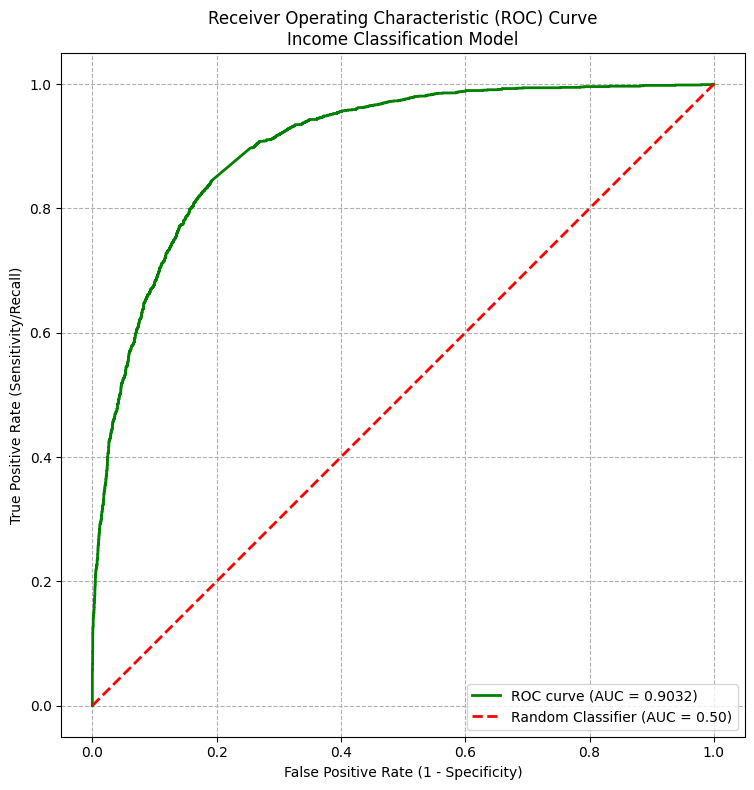

ROC AUC Score: 0.9032


In [107]:
# --- Plotting the ROC Curve ---

plt.figure(figsize=(8, 8))

# Plot the main ROC curve
plt.plot(
    fpr, tpr,
    color='green',
    lw=2,
    label=f'ROC curve (AUC = {roc:.4f})'
)

# Plot the diagonal baseline (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

# Set plot labels and title
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\nIncome Classification Model')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--')
plt.axis('square') # Makes the plot square
plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc:.4f}")


## TASK-02_Clustering (Unsupervised Learning)

In [ ]:
from sklearn.cluster import KMeans # Import KMeans for clustering

In [ ]:
dt = pd.read_csv('Mall_Customers.csv') # Read the CSV file into a pandas DataFrame

In [ ]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print('Shape of the dataset:',dt.shape)
print('\nColumns in the dataset:',dt.columns)
print('\nData types:',dt.dtypes)
print('\nMissing values in the dataset:',dt.isnull().sum())
print('\nDuplicate rows in the dataset:',dt.duplicated().sum())

Shape of the dataset: (200, 5)

Columns in the dataset: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Data types: CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in the dataset: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate rows in the dataset: 0


In [ ]:
dt.describe() # Generate descriptive statistics for the DataFrame

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dt_encoded = pd.get_dummies(dt, columns=['Gender'], drop_first=True) # Perform one-hot encoding on the 'Gender' column, dropping the first category
print(dt_encoded.head()) # Print the first 5 rows of the encoded DataFrame

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


In [ ]:
dt_encoded.drop(columns=['CustomerID'], axis=1, inplace=True) # Drop the 'CustomerID' column in place

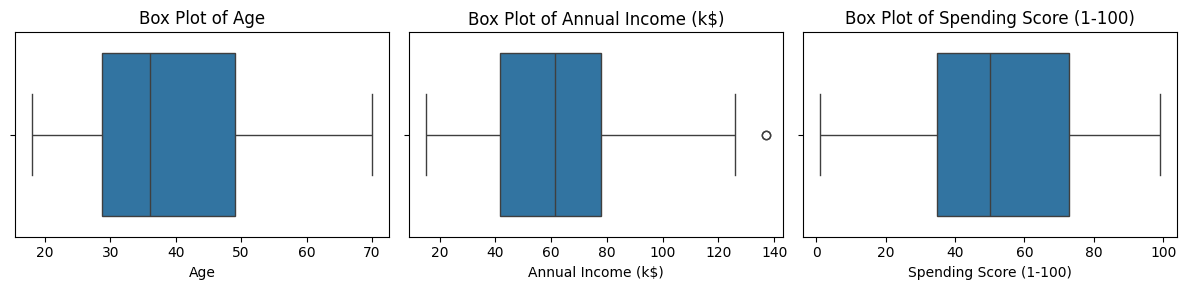

In [ ]:
# Select numerical columns for outlier detection
numerical_cols_dt = dt_encoded.select_dtypes(include=np.number).columns.tolist() # Get a list of names of numeric columns in the encoded DataFrame

# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(12, 3))
for i, col in enumerate(numerical_cols_dt): # Loop through the numeric columns
    plt.subplot(1, 3, i + 1) # Create a subplot for each column
    sns.boxplot(x=dt[col]) # Create a box plot for the current column
    plt.title(f'Box Plot of {col}') # Set the title for the box plot
plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(dt, factor=1.5): # Define a function to remove outliers
    dt_clean = dt_encoded.copy() # Create a copy of the encoded DataFrame
    for col in numerical_cols_dt: # Loop through the numeric columns
        Q1, Q3 = dt_clean[col].quantile([0.25, 0.75]) # Calculate the first and third quartiles
        IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)
        lower, upper = Q1 - factor * IQR, Q3 + factor * IQR # Calculate the lower and upper bounds for outlier detection
        dt_clean = dt_clean[(dt_clean[col] >= lower) & (dt_clean[col] <= upper)] # Filter the DataFrame to remove outliers
    return dt_clean # Return the DataFrame with outliers removed

dt_no_out = remove_outliers(dt) # Call the function to remove outliers


print("Shape of the dataset before outlier removal:", dt_encoded.shape)
print("Shape of the dataset after outlier removal:", dt_no_out.shape)

Shape of the dataset before outlier removal: (200, 4)
Shape of the dataset after outlier removal: (198, 4)


In [ ]:
dt_no_out.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


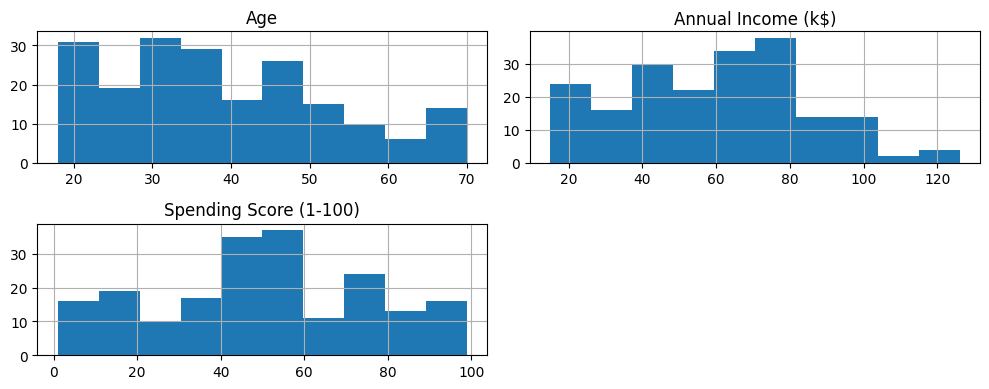

In [ ]:
dt_no_out.hist(figsize=(10, 4)) # Create histograms for the DataFrame
plt.tight_layout()
plt.show()

In [ ]:

standscale = StandardScaler() # Initialize StandardScaler


### Applying K-Means on Annual Income and Spending Score features.

In [ ]:

dt_annual_income_spending_score = dt_no_out[['Annual Income (k$)', 'Spending Score (1-100)']] # Select 'Annual Income (k$)' and 'Spending Score (1-100)' columns

dt_scaled1 = standscale.fit_transform(dt_annual_income_spending_score) # Fit scaler and transform the selected columns


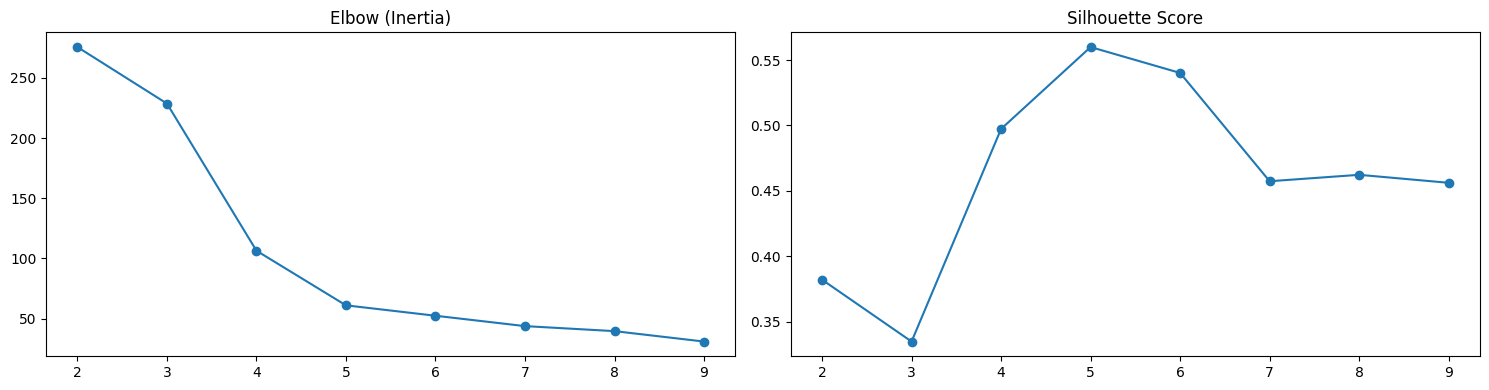

In [ ]:
from sklearn.metrics import silhouette_score # Import silhouette_score for evaluating clustering

inertia = [] # Initialize a list to store inertia values
silhouette = [] # Initialize a list to store silhouette scores
K = range(2, 10) # Define the range of K values to test for KMeans

for k in K: # Loop through each value of K
    kmeans = KMeans(n_clusters=k, random_state=1) # Initialize KMeans with the current number of clusters
    kmeans.fit(dt_scaled1) # Fit KMeans to the scaled data
    inertia.append(kmeans.inertia_) # Append the inertia value to the list
    silhouette.append(silhouette_score(dt_scaled1, kmeans.labels_)) # Calculate and append the silhouette score

plt.figure(figsize=(15,4))
plt.subplot(1,2,1) # Create the first subplot
plt.plot(K, inertia, 'o-'); plt.title('Elbow (Inertia)') # Plot the Elbow method (inertia vs K)
plt.subplot(1,2,2) # Create the second subplot
plt.plot(K, silhouette, 'o-'); plt.title('Silhouette Score') # Plot the Silhouette score vs K
plt.tight_layout()
plt.show()

In [ ]:
Kmeans = KMeans(n_clusters=5, random_state=1) # Initialize KMeans with 5 clusters
Kmeans.fit(dt_scaled1) # Fit KMeans to the scaled data

KMeans(n_clusters=5, random_state=1)

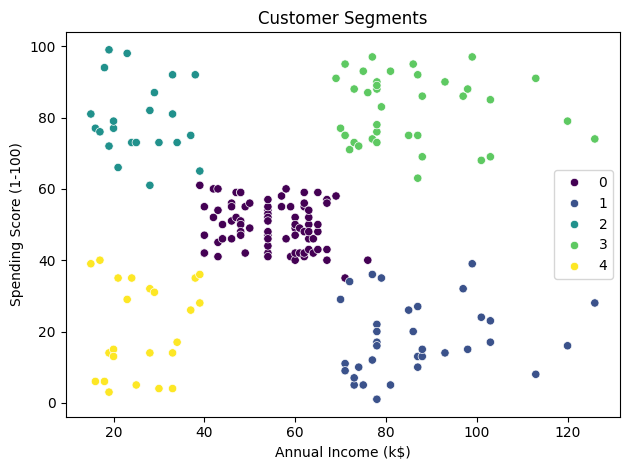

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=Kmeans.labels_, palette='viridis', data=dt_annual_income_spending_score) # Create a scatter plot of Annual Income vs Spending Score, colored by cluster labels


plt.title('Customer Segments') # Set the title of the plot
plt.xlabel('Annual Income (k$)') # Set the label for the x-axis
plt.ylabel('Spending Score (1-100)') # Set the label for the y-axis
plt.tight_layout()
plt.show()

### Applying K-Means on Age, Annual Income and Spending Score features.

In [ ]:
dt_age_annual_income_spending_score = dt_no_out[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # Select 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' columns

dt_scaled2 = standscale.fit_transform(dt_age_annual_income_spending_score) # Fit scaler and transform the selected columns

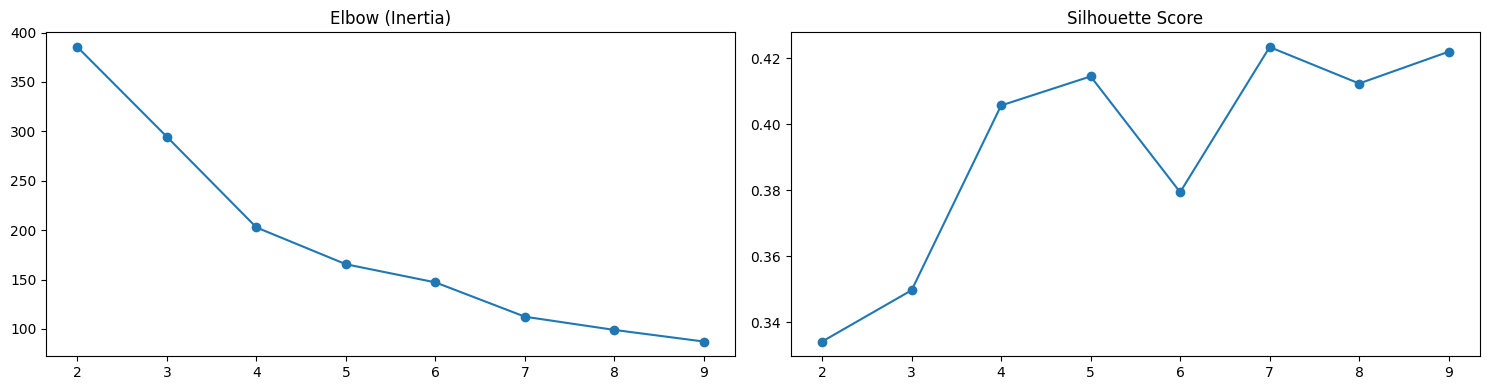

In [ ]:

# Performing similar steps for training and visualization as we did earlier

inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(dt_scaled2)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(dt_scaled2, kmeans.labels_))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-'); plt.title('Elbow (Inertia)')
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'o-'); plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

In [ ]:
Kmeans = KMeans(n_clusters=5, random_state=1)
Kmeans.fit(dt_scaled2)

KMeans(n_clusters=5, random_state=1)

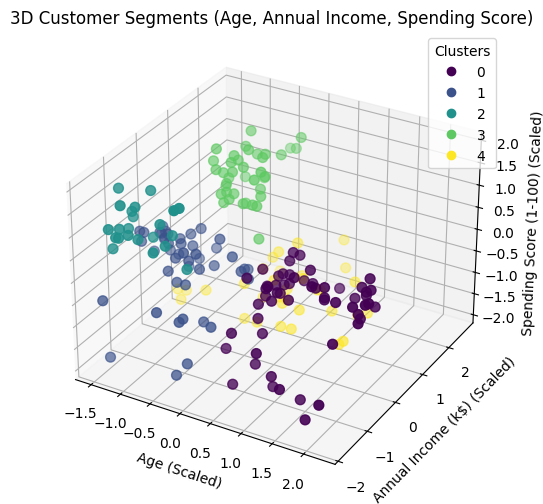

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # Import Axes3D for 3D plotting

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d') # Add a 3D subplot to the figure

scatter = ax.scatter(dt_scaled2[:, 0], dt_scaled2[:, 1], dt_scaled2[:, 2],
                     c=Kmeans.labels_, cmap='viridis', s=50) # Create a 3D scatter plot with scaled data, colored by cluster labels

ax.set_xlabel('Age (Scaled)') # Set the label for the x-axis
ax.set_ylabel('Annual Income (k$) (Scaled)') # Set the label for the y-axis
ax.set_zlabel('Spending Score (1-100) (Scaled)') # Set the label for the z-axis
ax.set_title('3D Customer Segments (Age, Annual Income, Spending Score)') # Set the title of the plot

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Clusters") # Add a legend for the clusters
plt.show()